In [120]:
from os import truncate

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

from power_prediction.preprocess_data import read_cleaned_data_retain_nan, read_cleaned_data_remove_nan, read_cleaned_data_interpolate_nan

In [47]:
df1 = read_cleaned_data_retain_nan()
df2 = read_cleaned_data_remove_nan()
df3 = read_cleaned_data_interpolate_nan()

In [48]:
df3.head()

,Unnamed: 0,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],...,Vacation,Holiday,Date_format,Year,Month,Day,Hour,Weekday,NE_tot,Corona
0,0,2014-12-31 23:00:00+00:00,65674.7507,135628.059644,89.25,0.0,0.02,-2.09,20.41,1.40,...,1.0,1.0,2014-12-31 23:00:00+00:00,2014,12,31,23,3,201302.810344,0
1,1,2015-01-01 00:00:00+00:00,88747.5885,172742.750946,90.47,0.0,0.01,-2.48,353.85,0.61,...,1.0,1.0,2015-01-01 00:00:00+00:00,2015,1,1,0,4,261490.339446,0
2,2,2015-01-01 01:00:00+00:00,86864.5321,173541.200194,89.45,0.0,0.02,-2.46,21.48,1.31,...,1.0,1.0,2015-01-01 01:00:00+00:00,2015,1,1,1,4,260405.732294,0
3,3,2015-01-01 02:00:00+00:00,84158.7339,162802.863240,89.20,0.0,0.02,-2.63,12.22,1.70,...,1.0,1.0,2015-01-01 02:00:00+00:00,2015,1,1,2,4,246961.597140,0
4,4,2015-01-01 03:00:00+00:00,81133.3041,154123.513780,89.56,0.0,0.02,-2.77,8.30,1.23,...,1.0,1.0,2015-01-01 03:00:00+00:00,2015,1,1,3,4,235256.817880,0


Dropping columns 'Unnamed: 0.1' and 'Unnamed: 0'

In [49]:
df1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
df2.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
df3.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

KeyError: "['Unnamed: 0.1', 'Unnamed: 0'] not found in axis"

Setting Date as index for timeseries analysis

In [50]:
df1_date_index = df1.set_index('Date', inplace=False)
df2_date_index = df2.set_index('Date', inplace=False)
df3_date_index = df3.set_index('Date', inplace=False)

# Visualizing the Data

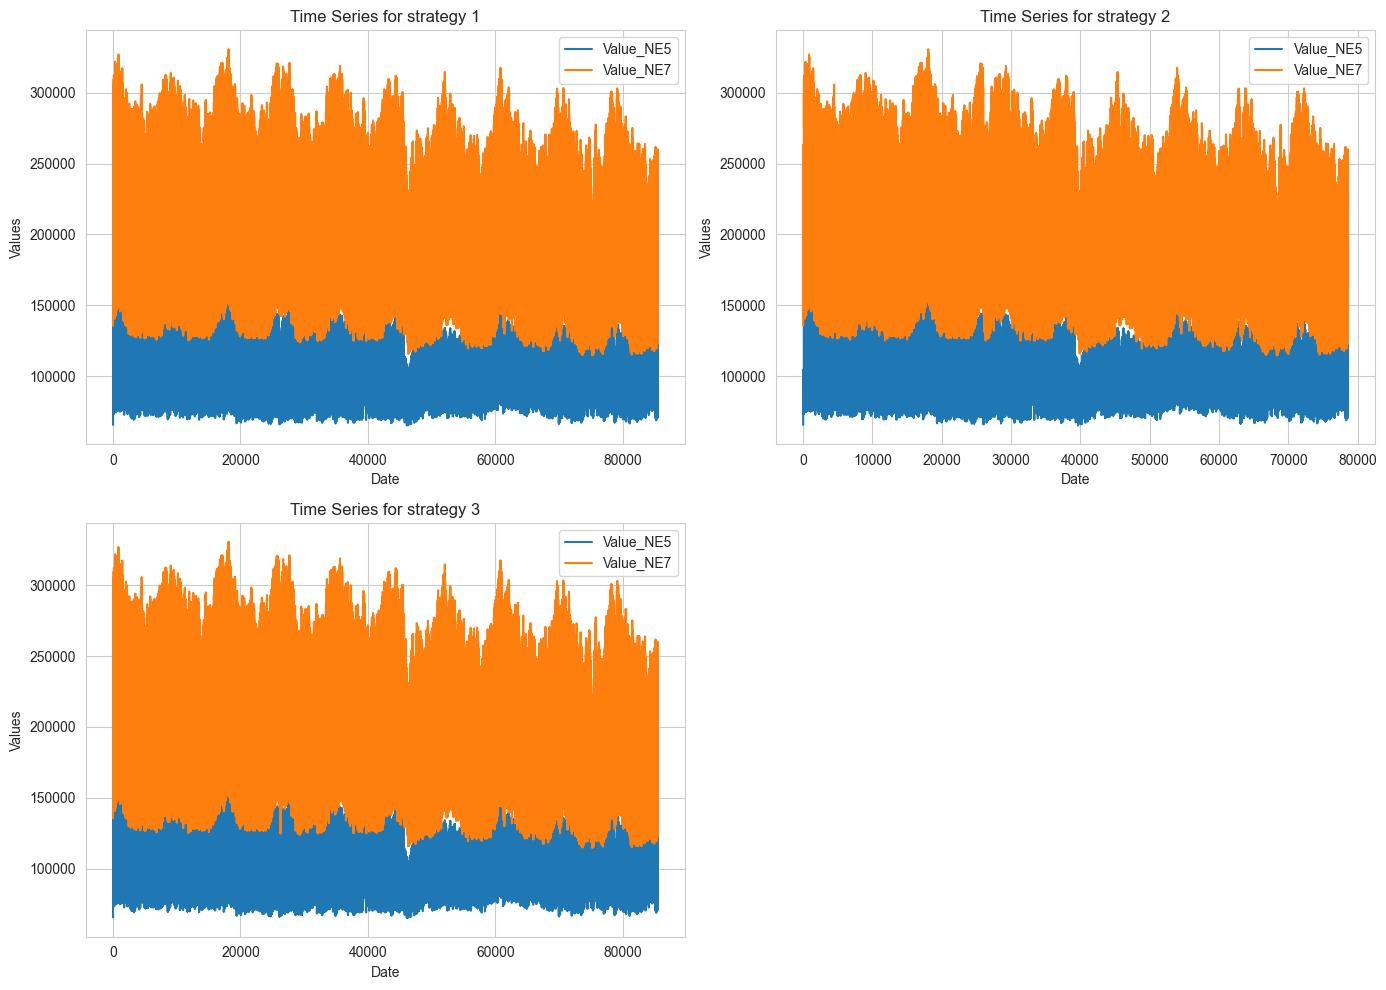

In [51]:
# Small multiple: 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First plot: df1
sns.lineplot(x=df1.index, y='Value_NE5', data=df1, label='Value_NE5', ax=axes[0, 0])
sns.lineplot(x=df1.index, y='Value_NE7', data=df1, label='Value_NE7', ax=axes[0, 0])
axes[0, 0].set_title('Time Series for strategy 1')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Values')
axes[0, 0].legend()

# Second plot: df2
sns.lineplot(x=df2.index, y='Value_NE5', data=df2, label='Value_NE5', ax=axes[0, 1])
sns.lineplot(x=df2.index, y='Value_NE7', data=df2, label='Value_NE7', ax=axes[0, 1])
axes[0, 1].set_title('Time Series for strategy 2')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Values')
axes[0, 1].legend()

# Third plot: df3
sns.lineplot(x=df3.index, y='Value_NE5', data=df3, label='Value_NE5', ax=axes[1, 0])
sns.lineplot(x=df3.index, y='Value_NE7', data=df3, label='Value_NE7', ax=axes[1, 0])
axes[1, 0].set_title('Time Series for strategy 3')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Values')
axes[1, 0].legend()

# Hide the 4th subplot
axes[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


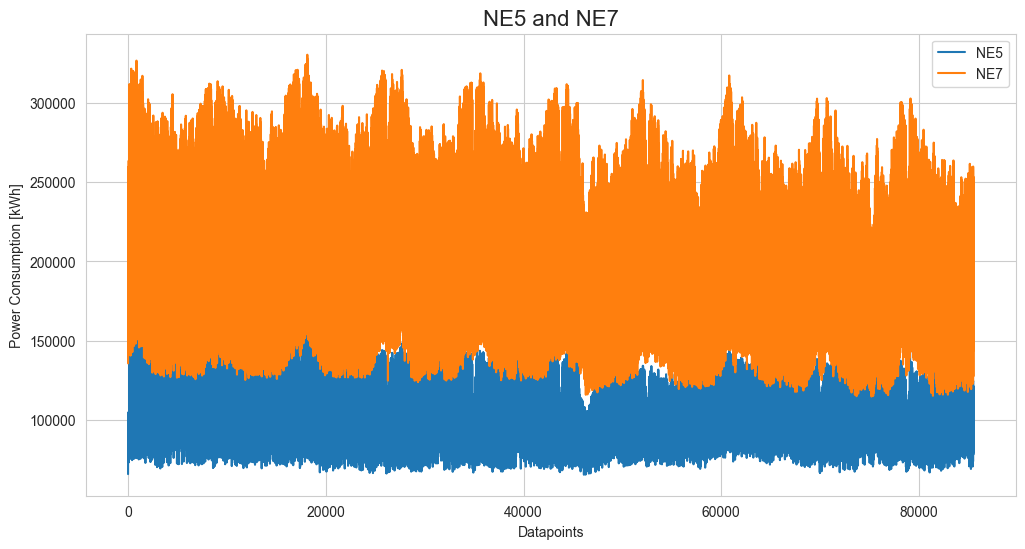

In [134]:
plt.figure(figsize=(12, 6))

# Plot NE5 values from anomaly_period with 'Date' as x-axis
sns.lineplot(x=df3.index, y='Value_NE5', data=df3, label='NE5')

# Plot NE7 values from anomaly_period with 'Date' as x-axis
sns.lineplot(x=df3.index, y='Value_NE7', data=df3, label='NE7')

plt.title('NE5 and NE7', fontsize=16)
plt.xlabel('Datapoints')
plt.ylabel('Power Consumption [kWh]')
plt.legend()

# Make x-tick-labels invisible
# plt.gca().tick_params(labelbottom=False)

plt.show()

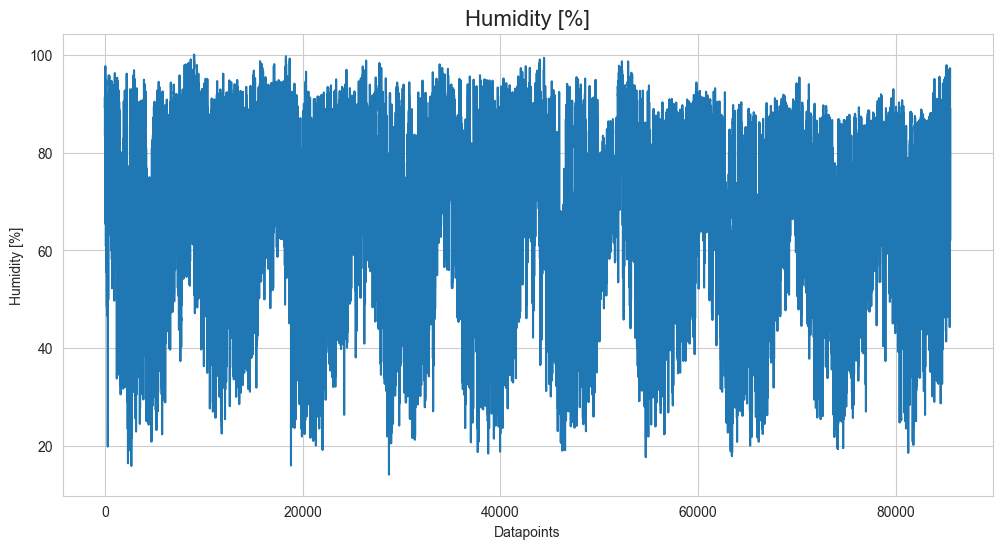

In [53]:
plt.figure(figsize=(12, 6))

# Plot NE5 values from anomaly_period with 'Date' as x-axis
sns.lineplot(x=df3.index, y='Hr [%Hr]', data=df3)

plt.title('Humidity [%]', fontsize=16)
plt.xlabel('Datapoints')
plt.ylabel('Humidity [%]')

# Make x-tick-labels invisible
# plt.gca().tick_params(labelbottom=False)

plt.show()

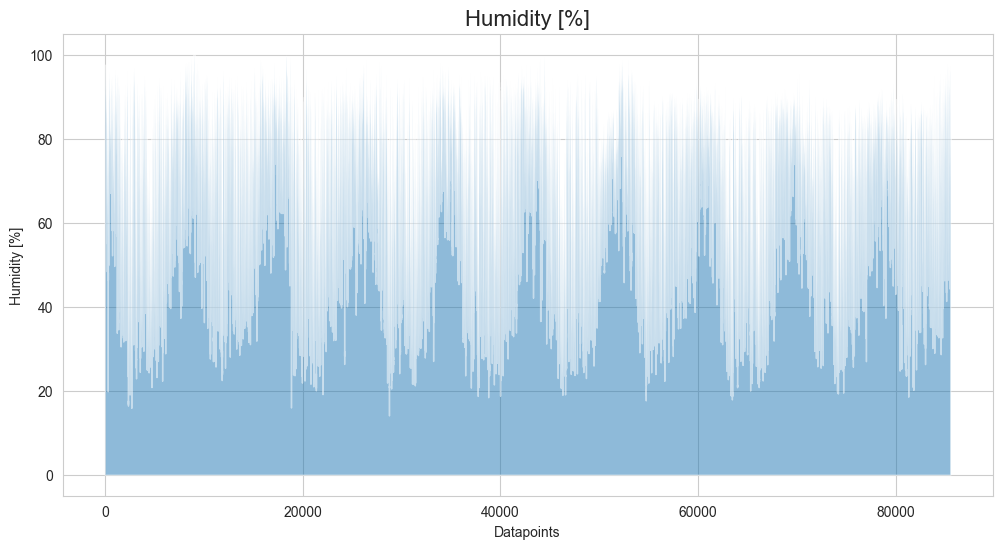

In [54]:
plt.figure(figsize=(12, 6))
plt.fill_between(df3.index, df3['Hr [%Hr]'], alpha=0.5)
plt.title('Humidity [%]', fontsize=16)
plt.xlabel('Datapoints')
plt.ylabel('Humidity [%]')
plt.show()



#### Regression plot for the course of electricity consumption

2015 - 2024

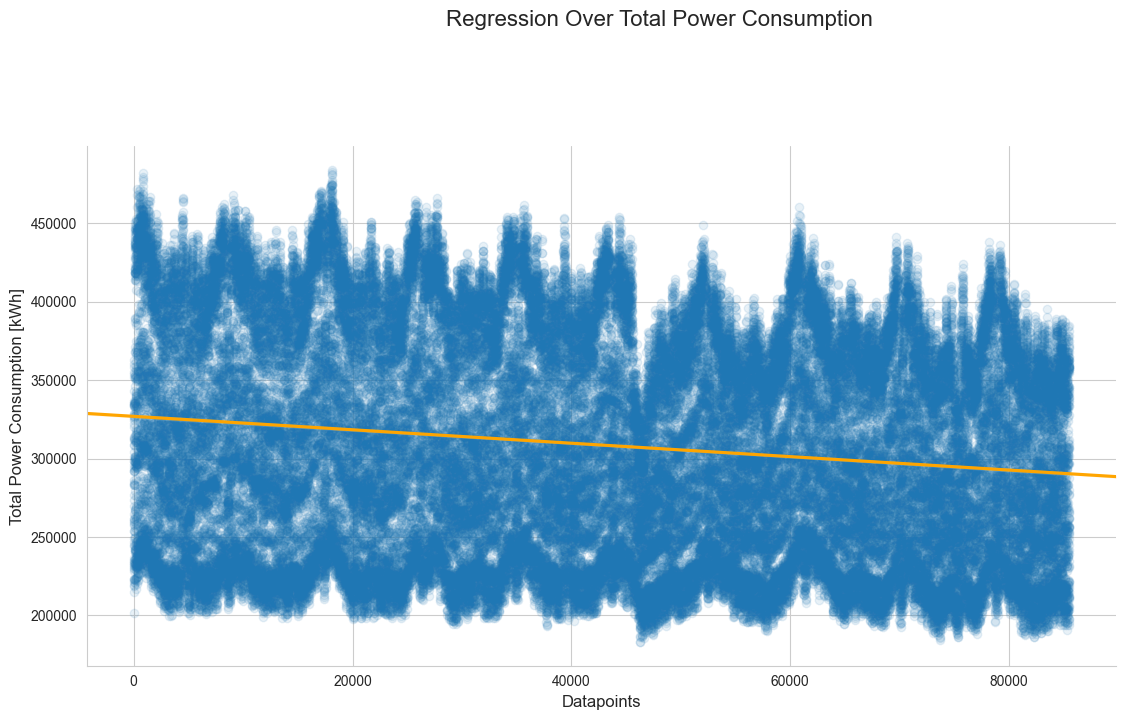

In [66]:
g = sns.jointplot(
    x=df1.index,
    y='NE_tot',
    data=df1,
    kind="reg",
    height=7,
    truncate=False,
    line_kws={'color': 'orange'},
    scatter_kws={'alpha': 0.1}
)

# Add title and labels using the appropriate axis
g.fig.suptitle('Regression Over Total Power Consumption', fontsize=16, y=1.02)  # Adjust y to position the title
g.ax_joint.set_xlabel('Datapoints', fontsize=12)
g.ax_joint.set_ylabel('Total Power Consumption [kWh]', fontsize=12)

g.ax_marg_x.remove()
g.ax_marg_y.remove()

# Adjust figure size
g.fig.set_size_inches(14, 7)

plt.show()




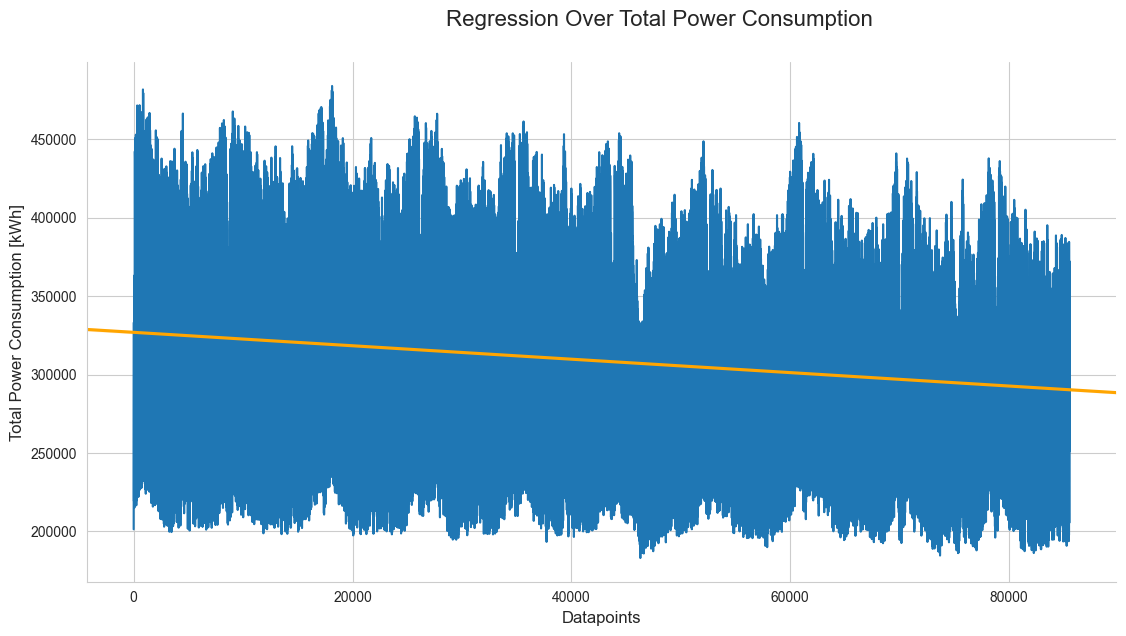

In [77]:
# Create a JointGrid
g = sns.JointGrid(data=df1, x=df1.index, y='NE_tot', height=7)

# Add a line plot to the JointGrid
g.plot(sns.lineplot, sns.histplot)

# Add a regression line to the JointGrid
sns.regplot(x=df1.index, y='NE_tot', data=df1, ax=g.ax_joint, scatter=False, color='r', line_kws={'color': 'orange'}, truncate=False)

# Add title and labels using the appropriate axis
g.fig.suptitle('Regression Over Total Power Consumption', fontsize=16, y=0.9)
g.ax_joint.set_xlabel('Datapoints', fontsize=12)
g.ax_joint.set_ylabel('Total Power Consumption [kWh]', fontsize=12)

g.ax_marg_x.remove()
g.ax_marg_y.remove()

# Adjust figure size
g.fig.set_size_inches(14, 7)

plt.show()

In [35]:
sns.jointplot(x=df1.index, y='NE_tot', data=df1,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

ValueError: 'df1' is not one of the example datasets.

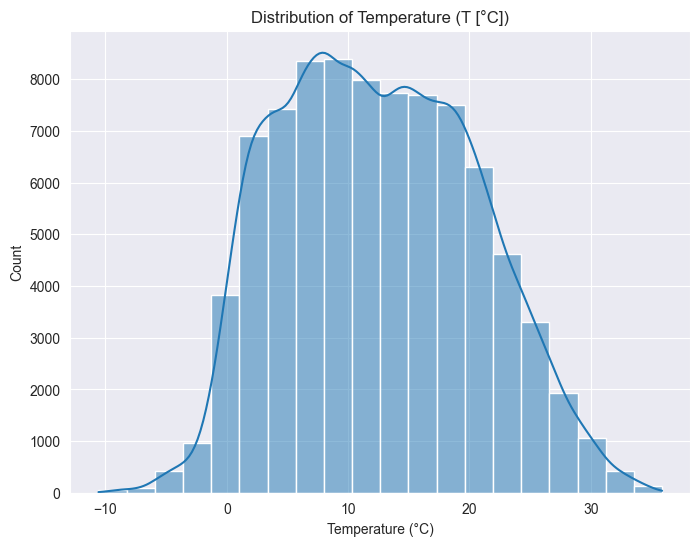

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['T [°C]'], bins=20, kde=True)
plt.title('Distribution of Temperature (T [°C])')
plt.xlabel('Temperature (°C)')
plt.show()


#### Correlation plots

In [93]:
df1.head()

,Date,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],...,Vacation,Holiday,Date_format,Year,Month,Day,Hour,Weekday,NE_tot,Corona
0,2014-12-31 23:00:00+00:00,65674.7507,135628.059644,89.25,0.0,0.02,-2.09,20.41,1.40,1.40,...,1.0,1.0,2014-12-31 23:00:00+00:00,2014,12,31,23,3,201302.810344,0
1,2015-01-01 00:00:00+00:00,88747.5885,172742.750946,90.47,0.0,0.01,-2.48,353.85,0.61,0.60,...,1.0,1.0,2015-01-01 00:00:00+00:00,2015,1,1,0,4,261490.339446,0
2,2015-01-01 01:00:00+00:00,86864.5321,173541.200194,89.45,0.0,0.02,-2.46,21.48,1.31,1.31,...,1.0,1.0,2015-01-01 01:00:00+00:00,2015,1,1,1,4,260405.732294,0
3,2015-01-01 02:00:00+00:00,84158.7339,162802.863240,89.20,0.0,0.02,-2.63,12.22,1.70,1.66,...,1.0,1.0,2015-01-01 02:00:00+00:00,2015,1,1,2,4,246961.597140,0
4,2015-01-01 03:00:00+00:00,81133.3041,154123.513780,89.56,0.0,0.02,-2.77,8.30,1.23,1.21,...,1.0,1.0,2015-01-01 03:00:00+00:00,2015,1,1,3,4,235256.817880,0


In [94]:
df1_filtered = df1.drop(columns=['Date', 'Date_format', 'Year', 'Month', 'Day', 'Hour', 'Weekday'], inplace=False)
df2_filtered = df2.drop(columns=['Date', 'Date_format', 'Year', 'Month', 'Day', 'Hour', 'Weekday'], inplace=False)
df3_filtered = df3.drop(columns=['Date', 'Date_format', 'Year', 'Month', 'Day', 'Hour', 'Weekday'], inplace=False)

In [95]:
columns_to_move = ['Value_NE5', 'Value_NE7', 'NE_tot']
df1_filtered_sorted = df1_filtered[columns_to_move + [col for col in df1_filtered.columns if col not in columns_to_move]]



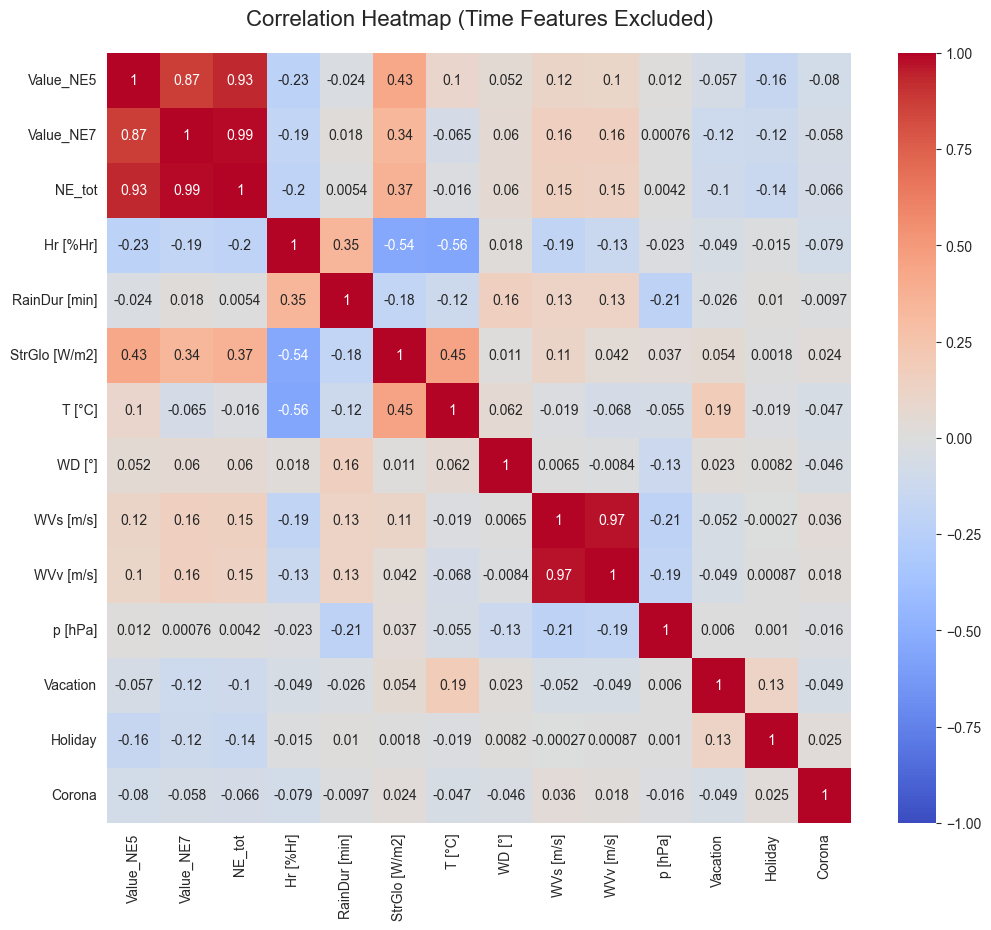

In [102]:
plt.figure(figsize=(12, 10))
corr_matrix = df1_filtered_sorted.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Time Features Excluded)', fontsize=16, y=1.025)
plt.show()

Correlation between powerusage and time

In [106]:
# List of columns to include
columns_to_include = ['Value_NE5', 'Value_NE7', 'NE_tot', 'Year', 'Month', 'Day', 'Hour', 'Weekday']  # Replace with actual column names
df1_filtered = df1[columns_to_include]
df2_filtered = df2[columns_to_include]
df3_filtered = df3[columns_to_include]

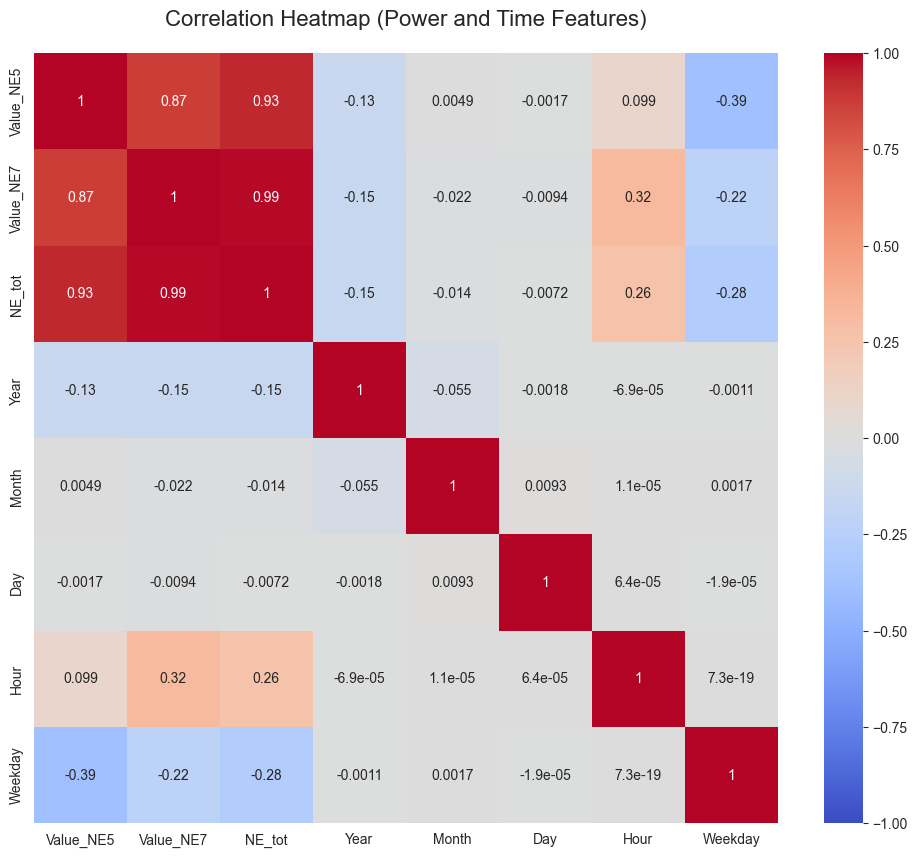

In [107]:
# Create the correlation matrix and plot the heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df1_filtered.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Power and Time Features)', fontsize=16, y=1.025)
plt.show()

### Winds Speed and Direction

**Radial Axis (Circles):**

Values (2, 4, 6, 8, etc.) indicate the magnitude of wind speed in meters per second (m/s)


**Angular Axis:**

0° corresponds to wind coming from Nort

90° corresponds to wind coming from East

180° corresponds to wind coming from South

270° corresponds to wind coming from West

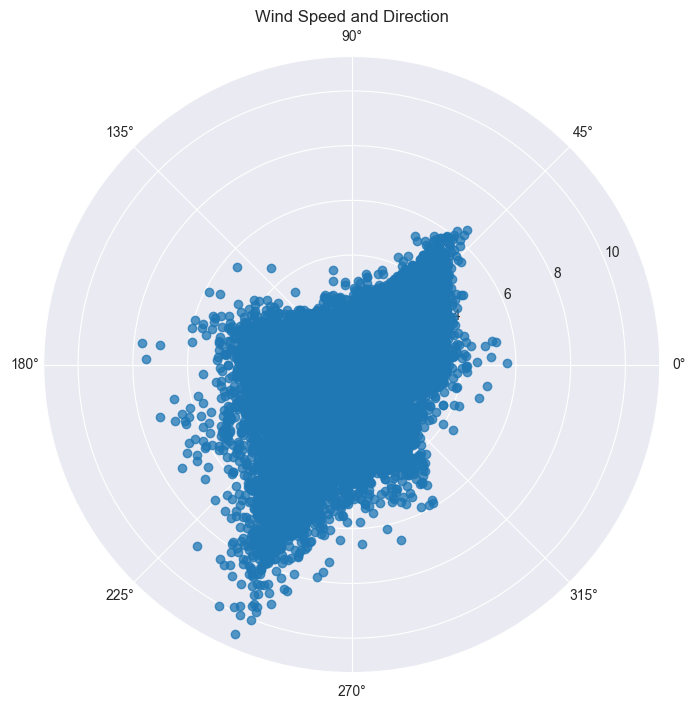

In [15]:
# Convert degrees to radians for plotting
wind_direction = np.radians(df1['WD [°]'])
wind_speed = df1['WVs [m/s]']

plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(wind_direction, wind_speed, alpha=0.75)
plt.title('Wind Speed and Direction')
plt.show()

In [19]:
df1_date_index.head()

,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],Vacation,Holiday,Date_format,Year,Month,Day,Hour,Weekday,NE_tot,Corona
Date,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,65674.7507,135628.059644,89.25,0.0,0.02,-2.09,20.41,1.40,1.40,982.80,1.0,1.0,2014-12-31 23:00:00+00:00,2014,12,31,23,3,201302.810344,0
2015-01-01 00:00:00+00:00,88747.5885,172742.750946,90.47,0.0,0.01,-2.48,353.85,0.61,0.60,982.64,1.0,1.0,2015-01-01 00:00:00+00:00,2015,1,1,0,4,261490.339446,0
2015-01-01 01:00:00+00:00,86864.5321,173541.200194,89.45,0.0,0.02,-2.46,21.48,1.31,1.31,983.00,1.0,1.0,2015-01-01 01:00:00+00:00,2015,1,1,1,4,260405.732294,0
2015-01-01 02:00:00+00:00,84158.7339,162802.863240,89.20,0.0,0.02,-2.63,12.22,1.70,1.66,982.93,1.0,1.0,2015-01-01 02:00:00+00:00,2015,1,1,2,4,246961.597140,0
2015-01-01 03:00:00+00:00,81133.3041,154123.513780,89.56,0.0,0.02,-2.77,8.30,1.23,1.21,983.03,1.0,1.0,2015-01-01 03:00:00+00:00,2015,1,1,3,4,235256.817880,0


#### Week

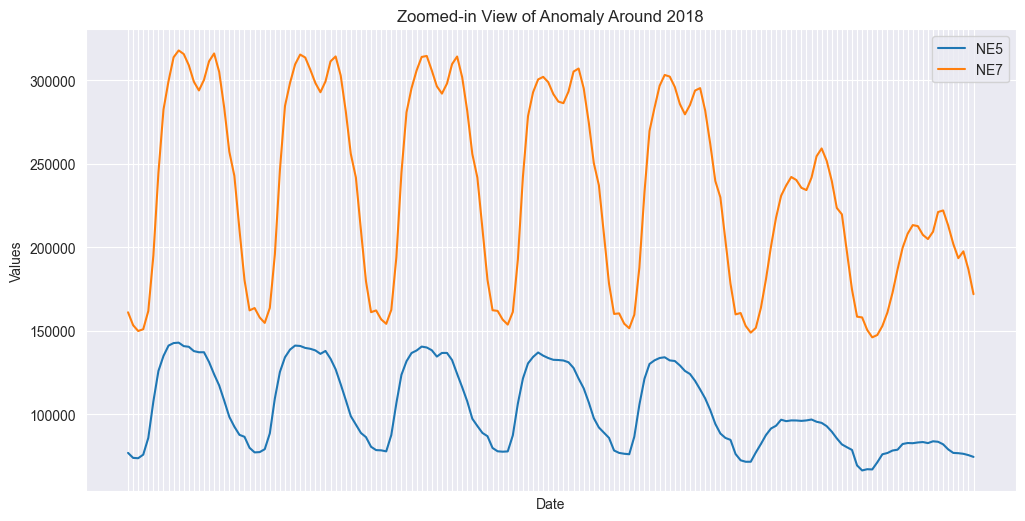

In [31]:
# Filter the dataset to focus on a week
anomaly_period = df1_date_index.loc['2017-12-18':'2017-12-25'].copy()

plt.figure(figsize=(12, 6))

# Plot NE5 values from anomaly_period with 'Date' as x-axis
sns.lineplot(x='Date_format', y='Value_NE5', data=anomaly_period, label='NE5')

# Plot NE7 values from anomaly_period with 'Date' as x-axis
sns.lineplot(x='Date_format', y='Value_NE7', data=anomaly_period, label='NE7')

plt.title('Zoomed-in View of Anomaly Around 2018')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Make x-tick-labels invisible
plt.gca().tick_params(labelbottom=False)

plt.show()


In [121]:
start_date = '2020-03-01'
end_date = '2021-06-30'

# Generate evenly spaced dates (e.g., 6 ticks)
custom_ticks = pd.date_range(start=start_date, end=end_date, periods=6).strftime('%Y-%m-%d').tolist()


In [129]:
# Define the corona period
df1_corona = df1_date_index.loc['2020-03-01':'2021-06-30'].copy()

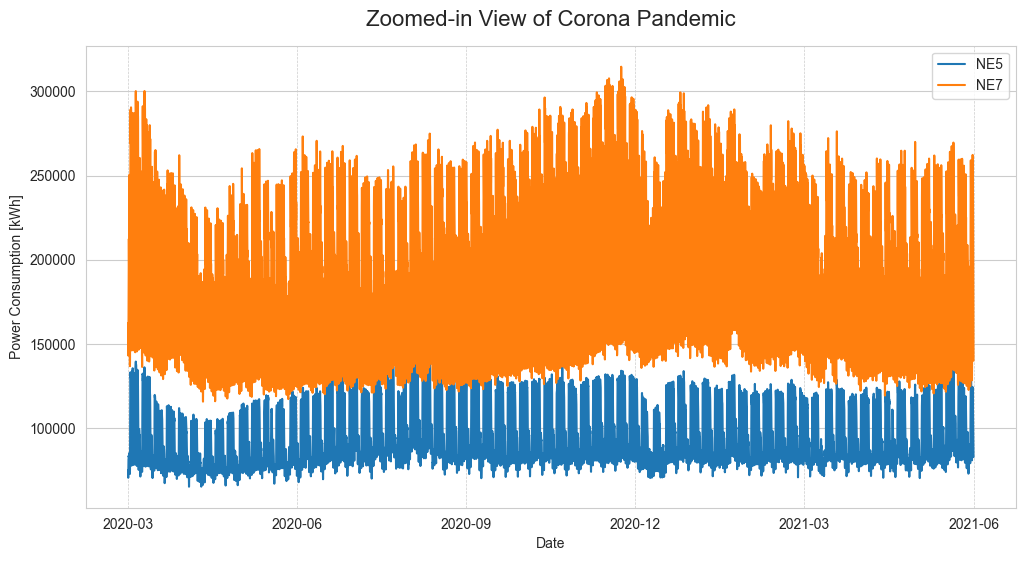

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date_format is in datetime format
df1_corona['Date_format'] = pd.to_datetime(df1_corona['Date_format'])

# Generate evenly spaced dates
start_date = '2020-03-01'
end_date = '2021-06-30'
custom_ticks = pd.date_range(start=start_date, end=end_date, periods=6)

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')
plt.gca().set_facecolor('white')

# Set custom ticks and labels
plt.xticks(custom_ticks)
plt.gca().set_xticklabels(custom_ticks.strftime('%Y-%m'))

# Force grid lines on both major and minor ticks
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)

sns.lineplot(x='Date_format', y='Value_NE5', data=df1_corona, label='NE5')
sns.lineplot(x='Date_format', y='Value_NE7', data=df1_corona, label='NE7')

plt.title('Zoomed-in View of Corona Pandemic', fontsize=16, y=1.025)
plt.xlabel('Date')
plt.ylabel('Power Consumption [kWh]')
plt.legend()

plt.show()


In [110]:
df1_corona = df1_date_index.loc['2020-03-01':'2021-06-30'].copy()

In [112]:
plt.figure(figsize=(12, 6))

# Plot NE5 values from anomaly_period with 'Date' as x-axis
sns.lineplot(x=df1_corona.index, y='Value_NE5', data=df1_corona, label='NE5')

# Plot NE7 values from anomaly_period with 'Date' as x-axis
sns.lineplot(x=df1_corona.index, y='Value_NE7', data=df1_corona, label='NE7')

plt.title('NE5 and NE7', fontsize=16)
plt.xlabel('Datapoints')
plt.ylabel('Powerconsumption [kWh]')
plt.legend()

# Make x-tick-labels invisible
# plt.gca().tick_params(labelbottom=False)

plt.show()

KeyboardInterrupt: 

# Corona Lockdowns

1. Lockdown: 18.03.2020 - 06.06.2020
2. Lockdown: 18.01.2021 - 03.03.2021